# 필요 라이브러리 호출 및 데이터 전처리

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')  # Windows의 경우
plt.rcParams['axes.unicode_minus'] = False

file_path = 'C:\\Users\\IT\\OneDrive\\Yeonze\\DA_데브코스\\최종프로젝트\\데이터셋\\병합\\'

df_tv = pd.read_csv(file_path + 'tn_travel_여행.csv')
df_tm = pd.read_csv(file_path + 'tn_traveller_master_여행객 Master.csv', encoding='ANSI')
df_acthis = pd.read_csv(file_path + 'tn_activity_his_활동내역.csv', encoding='ANSI')
df_actconhis = pd.read_csv(file_path + 'tn_activity_consume_his_활동소비내역.csv')
df_advconhis = pd.read_csv(file_path + 'tn_adv_consume_his_사전소비내역.csv')
df_tc = pd.read_csv(file_path + 'tn_companion_info_동반자정보.csv')
df_lodconhis = pd.read_csv(file_path + 'tn_lodge_consume_his_숙박소비내역.csv', encoding='ANSI')
df_mov = pd.read_csv(file_path + 'tn_move_his_이동내역.csv')
df_movconhis = pd.read_csv(file_path + 'tn_mvmn_consume_his_이동수단소비내역.csv')
df_visarea = pd.read_csv(file_path + 'tn_visit_area_info_방문지정보_depthregion_cleaned.csv')
df_code = pd.read_csv('C:\\Users\\IT\\OneDrive\\Yeonze\\DA_데브코스\\최종프로젝트\\데이터셋\\병합\\tc_codeb_코드B.csv', encoding='ANSI')
df_SGG = pd.read_csv('C:\\Users\\IT\\OneDrive\\Yeonze\\DA_데브코스\\최종프로젝트\\데이터셋\\병합\\tc_sgg_시군구코드.csv', encoding='ANSI')
df_move = pd.read_csv('C:\\Users\\IT\\OneDrive\\Yeonze\\DA_데브코스\\최종프로젝트\\데이터셋\\병합\\Movement.csv')

In [23]:
def df_tm_preprocessed(df, df_code):
    # 여행자 master 데이터
    df['EDU_NM'] = df['EDU_NM'].astype(str)
    df['EDU_FNSH_SE'] = df['EDU_FNSH_SE'].astype(str)
    df['MARR_STTS'] = df['MARR_STTS'].astype(str)
    df['JOB_NM'] = df['JOB_NM'].astype(str)
    df['INCOME'] = df['INCOME'].astype(str)
    df['HOUSE_INCOME'] = df['HOUSE_INCOME'].astype(str)
    df['TRAVEL_TERM'] = df['TRAVEL_TERM'].astype(str)
    
    # 이후 매핑 진행
    df['EDU_NM'] = df['EDU_NM'].map(df_code[df_code['cd_a'] == 'EDU'].set_index('cd_b')['cd_nm'])
    df['EDU_FNSH_SE'] = df['EDU_FNSH_SE'].map(df_code[df_code['cd_a'] == 'EFS'].set_index('cd_b')['cd_nm'])
    df['MARR_STTS'] = df['MARR_STTS'].map(df_code[df_code['cd_a'] == 'MAR'].set_index('cd_b')['cd_nm'])
    df['JOB_NM'] = df['JOB_NM'].map(df_code[df_code['cd_a'] == 'JOB'].set_index('cd_b')['cd_nm'])
    df['INCOME'] = df['INCOME'].map(df_code[df_code['cd_a'] == 'INC'].set_index('cd_b')['cd_nm'])
    df['HOUSE_INCOME'] = df['HOUSE_INCOME'].map(df_code[df_code['cd_a'] == 'INC'].set_index('cd_b')['cd_nm'])
    df['TRAVEL_TERM'] = df['TRAVEL_TERM'].map(df_code[df_code['cd_a'] == 'INC'].set_index('cd_b')['cd_nm'])

    # TRAVEL_STYL, TRAVEL_MOTIVE 컬럼들도 모두 문자열(str)로 변환
    for i in range(1, 9):  # TRAVEL_STYL1부터 TRAVEL_STYL9까지
        column_name = f'TRAVEL_STYL_{i}'
        df[column_name] = df[column_name].astype(str)
    
    for i in range(1, 4):  # TRAVEL_MOTIVE1부터 TRAVEL_MOTIVE3까지
        column_name = f'TRAVEL_MOTIVE_{i}'
        df[column_name] = df[column_name].astype(str)
    
    # df_code['cd_b']도 문자열(str)로 변환
    df_code['cd_b'] = df_code['cd_b'].astype(str)
    
    for i in range(1, 9):  # TRAVEL_STYL1부터 TRAVEL_STYL9까지
        column_name = f'TRAVEL_STYL_{i}'
        df[column_name] = df[column_name].map(df_code[df_code['cd_a'] == 'TSY'].set_index('cd_b')['cd_nm'])
    
    for i in range(1, 4):  # TRAVEL_MOTIVE1부터 TRAVEL_MOTIVE3까지
        column_name = f'TRAVEL_MOTIVE_{i}'
        df[column_name] = df[column_name].map(df_code[df_code['cd_a'] == 'TMT'].set_index('cd_b')['cd_nm'])

    return df

df_tm = df_tm_preprocessed(df_tm, df_code)

In [24]:
def df_tc_preprocessed(df, df_code):
    # 동행자 데이터
    df['REL_CD'] = df['REL_CD'].astype(str)
    df['COMPANION_GENDER'] = df['COMPANION_GENDER'].astype(str)
    df['COMPANION_AGE_GRP'] = df['COMPANION_AGE_GRP'].astype(str)
    df['COMPANION_SITUATION'] = df['COMPANION_SITUATION'].astype(str)
    
    df['REL_CD'] = df['REL_CD'].map(df_code[df_code['cd_a'] == 'TCR'].set_index('cd_b')['cd_nm'])
    df['COMPANION_GENDER'] = df['COMPANION_GENDER'].map(df_code[df_code['cd_a'] == 'GEN'].set_index('cd_b')['cd_nm'])
    df['COMPANION_AGE_GRP'] = df['COMPANION_AGE_GRP'].map(df_code[df_code['cd_a'] == 'AGE'].set_index('cd_b')['cd_nm'])
    df['COMPANION_SITUATION'] = df['COMPANION_SITUATION'].map(df_code[df_code['cd_a'] == 'CST'].set_index('cd_b')['cd_nm'])
    return df

df_tc = df_tc_preprocessed(df_tc, df_code)

In [25]:
df_tm = df_tm.merge(df_tv[['TRAVELER_ID', 'TRAVEL_ID']], on='TRAVELER_ID', how='left')

In [26]:
mapping_dict = {
    1: 2, 2: 3, 3: 4, 4: 4, 5: 3, 6: 4, 7: 3, 8: 5,
    9: 4, 10: 5, 11: 3, 12: 4, 13: 6, 21: 5, 22: 4, 23: 5,
    24: 4, 25: 4, 26: 4, 27: 3, 28: 3
}

def map_travel_purpose(purpose_str):
    # 문자열을 세미콜론(;)으로 분리하여 각 요소를 int로 변환
    purpose_codes = map(int, purpose_str.split(';'))
    # 각 코드에 대한 매핑 값을 찾아서 리스트로 반환한 후, 문자열로 결합
    mapped_values = [str(mapping_dict.get(code, code)) for code in purpose_codes]
    # 리스트를 세미콜론으로 결합하여 문자열로 반환
    return ';'.join(mapped_values)

# df_tv의 TRAVEL_PURPOSE 값에 함수 적용
df_tv['TRAVEL_PURPOSE'] = df_tv['TRAVEL_PURPOSE'].apply(map_travel_purpose)

# df_tm과 df_tv를 TRAVEL_ID 기준으로 병합하여 mapped_TRAVEL_PURPOSE 추가
df_tm = df_tm.merge(df_tv[['TRAVEL_ID', 'TRAVEL_PURPOSE']], on='TRAVEL_ID', how='left')

In [27]:
df_list = df_acthis.groupby('TRAVEL_ID')['ACTIVITY_TYPE_CD'].apply(list).reset_index()
df_tm = pd.merge(df_tm, df_list[['TRAVEL_ID', 'ACTIVITY_TYPE_CD']], on='TRAVEL_ID', how='left')
df_tm['TRAVEL_PURPOSE'] = df_tm['TRAVEL_PURPOSE'].apply(lambda x: list(map(int, x.split(';'))))

def calculate_weighted_activity(row):
    activity_values = row['ACTIVITY_TYPE_CD']
    travel_purpose_values = row['TRAVEL_PURPOSE']
    
    # TRAVEL_PURPOSE 값에 없는 항목을 제외하고 필터링
    filtered_values = [value for value in activity_values if value in travel_purpose_values]
    
    # 각 값의 개수를 세고, TRAVEL_PURPOSE에 있는 값에 가중치를 2배 주기
    weighted_values = []
    for value in filtered_values:
        count = activity_values.count(value)  # 해당 값의 발생 횟수
        weight = 2 if value in travel_purpose_values else 1  # TRAVEL_PURPOSE에 있으면 가중치 2배
        weighted_values.append(count * weight)  # 가중치 적용
    
    # 가중치가 가장 큰 값을 찾기
    if weighted_values:
        max_weight = max(weighted_values)
        max_value = filtered_values[weighted_values.index(max_weight)]  # 가중치가 가장 큰 값
        return max_value
    else:
        return 99 

# apply 함수로 각 행에 대해 계산
df_tm['ACTIVITY'] = df_tm.apply(calculate_weighted_activity, axis=1)
df_tm['ACTIVITY'] = df_tm['ACTIVITY'].astype(str)
df_tm['ACTIVITY'] = df_tm['ACTIVITY'].map(df_code[df_code['cd_a'] == 'ACT'].set_index('cd_b')['cd_nm'])

In [28]:
def calculate_sleep_duration(row):
    # 날짜 범위를 분리
    start_date, end_date = row['TRAVEL_STATUS_YMD'].split('~')
    # 문자열을 날짜로 변환
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    # 날짜 차이를 계산
    return (end_date - start_date).days

# 새로운 SLEEP 컬럼 추가
df_tm['SLEEP'] = df_tm.apply(calculate_sleep_duration, axis=1)

In [29]:
df_cluster = pd.merge(df_tm[['TRAVEL_ID','AGE_GRP', 'TRAVEL_COMPANIONS_NUM', 'TRAVEL_STATUS_ACCOMPANY', 'SLEEP', 'ACTIVITY']], df_move[['TRAVEL_ID','RESULT_MVMN']], on='TRAVEL_ID',how='left')

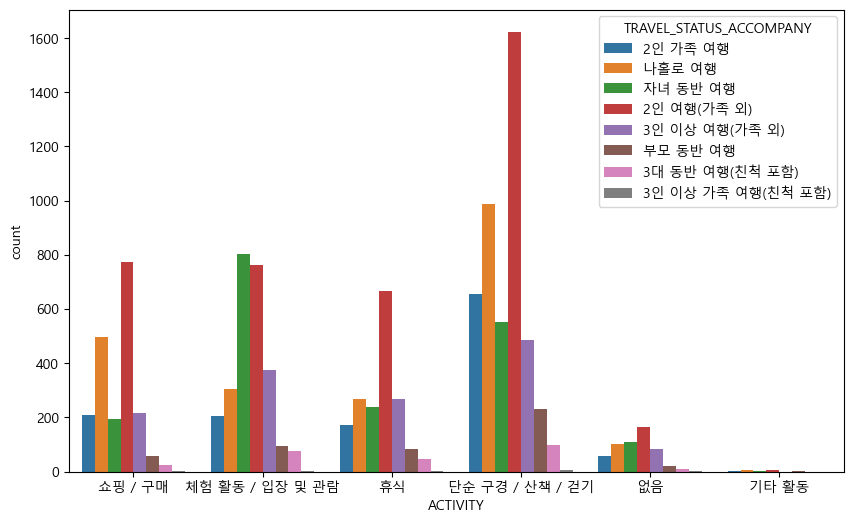

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x='ACTIVITY', data=df_tm, hue='TRAVEL_STATUS_ACCOMPANY')
plt.show()

In [13]:
df_visarea['VISIT_START_YMD'] = pd.to_datetime(df_visarea['VISIT_START_YMD'])

In [19]:
df_time = df_visarea[['TRAVEL_ID', 'VISIT_START_YMD', 'month']]
df_time.head()

,TRAVEL_ID,VISIT_START_YMD,month
0,e_e000004,2023-04-30,2023-04
1,e_e000004,2023-04-30,2023-04
2,e_e000004,2023-04-30,2023-04
3,e_e000006,2023-04-30,2023-04
4,e_e000006,2023-04-30,2023-04


In [25]:
df_g = df_time.groupby(['TRAVEL_ID', 'VISIT_START_YMD', 'month'])['TRAVEL_ID'].count().reset_index(name='count')

In [26]:
df_g.head()

,TRAVEL_ID,VISIT_START_YMD,month,count
0,e_e000003,2023-04-30,2023-04,4
1,e_e000004,2023-04-30,2023-04,3
2,e_e000005,2023-04-29,2023-04,7
3,e_e000005,2023-04-30,2023-04,7
4,e_e000005,2023-05-01,2023-05,5


In [28]:
df_g = pd.merge(df_g, df_tm[['TRAVEL_ID', 'ACTIVITY']], on='TRAVEL_ID', how='left')

In [29]:
df_g.head()

,TRAVEL_ID,VISIT_START_YMD,month,count,ACTIVITY
0,e_e000003,2023-04-30,2023-04,4,체험 활동 / 입장 및 관람
1,e_e000004,2023-04-30,2023-04,3,단순 구경 / 산책 / 걷기
2,e_e000005,2023-04-29,2023-04,7,휴식
3,e_e000005,2023-04-30,2023-04,7,휴식
4,e_e000005,2023-05-01,2023-05,5,휴식


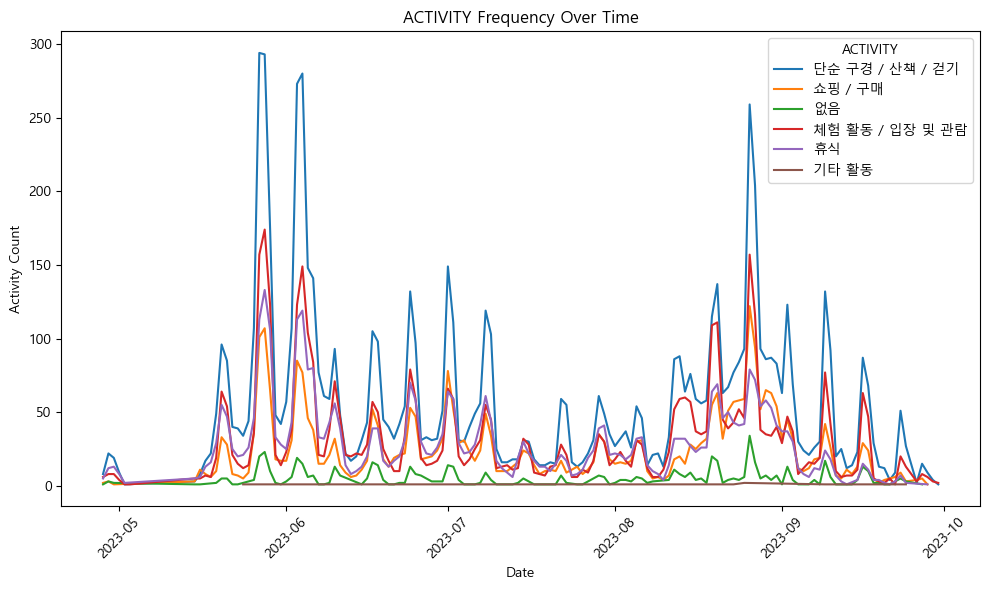

In [38]:
# 날짜별로 ACTIVITY의 빈도 계산
df_activity_count = df_g.groupby(['VISIT_START_YMD', 'ACTIVITY']).size().reset_index(name='count')

# 시계열 데이터 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_activity_count, x='VISIT_START_YMD', y='count', hue='ACTIVITY')

# 그래프 제목 및 레이블 설정
plt.title('ACTIVITY Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Activity Count')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력

# 클러스터링

## 데이터 전처리

In [29]:
import random
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# fix seed
def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

SEED = 42
seed_everything(SEED)

In [326]:
df_cluster.head()

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN
0,e_e004720,60,1,2인 가족 여행,0,쇼핑 / 구매,시내/마을버스
1,e_e000914,20,0,나홀로 여행,0,쇼핑 / 구매,KTX/SRT(고속열차)
2,e_e003564,30,3,자녀 동반 여행,0,체험 활동 / 입장 및 관람,자가용(승용/승합/트럭 등등)
3,e_e000396,30,1,2인 가족 여행,1,휴식,자가용(승용/승합/트럭 등등)
4,e_e001890,20,1,2인 여행(가족 외),0,단순 구경 / 산책 / 걷기,시외/고속버스


In [327]:
df_cp1 = df_cluster.copy()
df_cp2 = df_cluster.copy()

In [328]:
df_cp1 = df_cp1.drop(columns = 'TRAVEL_ID')
df_cp2 = df_cp2.drop(columns = 'TRAVEL_ID')
df_cp2.head()

,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN
0,60,1,2인 가족 여행,0,쇼핑 / 구매,시내/마을버스
1,20,0,나홀로 여행,0,쇼핑 / 구매,KTX/SRT(고속열차)
2,30,3,자녀 동반 여행,0,체험 활동 / 입장 및 관람,자가용(승용/승합/트럭 등등)
3,30,1,2인 가족 여행,1,휴식,자가용(승용/승합/트럭 등등)
4,20,1,2인 여행(가족 외),0,단순 구경 / 산책 / 걷기,시외/고속버스


In [312]:
# 범주형 컬럼만 선택
categorical_columns = df_cp1.select_dtypes(include='object').columns

# 범주형 데이터를 원-핫 인코딩
df_cp1 = pd.get_dummies(df_cp1, columns=categorical_columns, drop_first=True)

df_cp1 = df_cp1.astype(int)

# 정규화
from sklearn.preprocessing import StandardScaler

numeric_columns = ['AGE_GRP', 'TRAVEL_COMPANIONS_NUM', 'SLEEP']

# StandardScaler 객체 생성
scaler = StandardScaler()

# 수치형 데이터 표준화
df_cp1[numeric_columns] = scaler.fit_transform(df_cp1[numeric_columns])

c:\users\it\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\it\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\it\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\it\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1

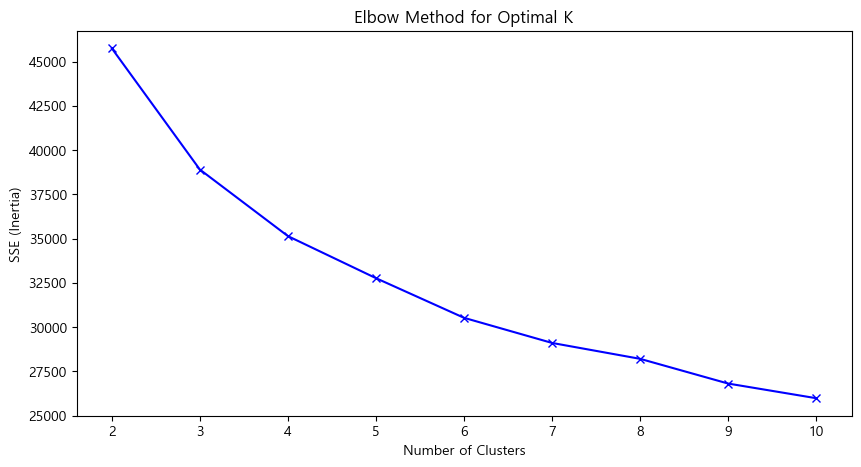

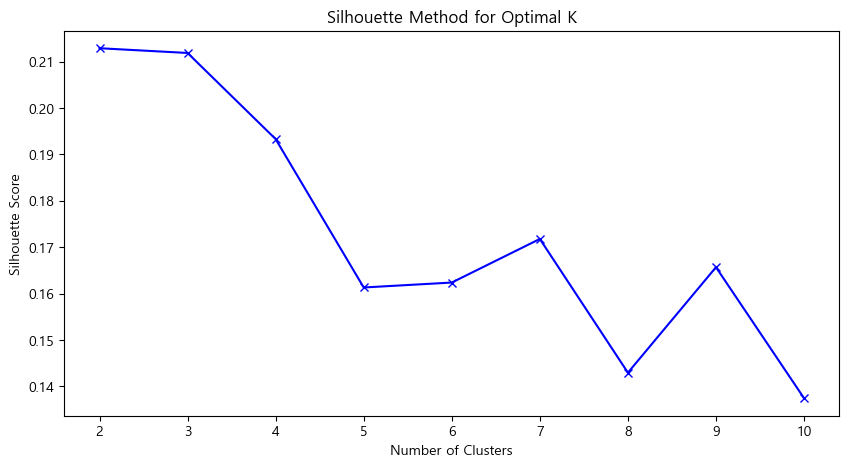

In [245]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 최적의 클러스터 수를 찾기 위한 리스트 초기화
sse = []  # 엘보우용 리스트
silhouette_scores = []  # 실루엣용 리스트
k_values = range(2, 11)  # 테스트할 클러스터 개수 범위

# 수치형 컬럼만 선택
df_numeric = df_cp1.select_dtypes(include=[np.number])

# 각 K에 대해 엘보우와 실루엣 점수 계산
for k in k_values:
    # KMeans 설정
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(df_numeric)
    
    # SSE (Inertia) 계산
    sse.append(kmeans.inertia_)
    
    # 실루엣 점수 계산
    silhouette_avg = silhouette_score(df_numeric, clusters)  # 유클리드 거리 사용
    silhouette_scores.append(silhouette_avg)

# 엘보우 방법 시각화
plt.figure(figsize=(10, 5))
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

# 실루엣 계수 시각화
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.show()


In [313]:
# 최적의 클러스터 수를 선택 
optimal_k = 9

# KMeans 모델을 최적의 클러스터 수로 학습
kmeans = KMeans(n_clusters=optimal_k, random_state=SEED)
kmeans.fit(df_cp1)

# 클러스터 레이블을 데이터프레임에 추가
df_cluster['Cluster'] = kmeans.labels_

c:\users\it\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [314]:
# df_cluster.to_csv('cluster.csv', index=False, encoding='utf-8-sig')

In [315]:
df_clus0 = df_cluster.loc[df_cluster['Cluster'] == 0, :]
df_clus1 = df_cluster.loc[df_cluster['Cluster'] == 1, :]
df_clus2 = df_cluster.loc[df_cluster['Cluster'] == 2, :]
df_clus3 = df_cluster.loc[df_cluster['Cluster'] == 3, :]
df_clus4 = df_cluster.loc[df_cluster['Cluster'] == 4, :]
df_clus5 = df_cluster.loc[df_cluster['Cluster'] == 5, :]
df_clus6 = df_cluster.loc[df_cluster['Cluster'] == 6, :]
df_clus7 = df_cluster.loc[df_cluster['Cluster'] == 7, :]
df_clus8 = df_cluster.loc[df_cluster['Cluster'] == 8, :]

In [316]:
df_clus0.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,1471,1471.000000,1471.000000,1471,1471.000000,1471,1471,1471.0
unique,1471,NaN,NaN,8,NaN,6,12,NaN
top,e_e006179,NaN,NaN,2인 여행(가족 외),NaN,단순 구경 / 산책 / 걷기,항공기,NaN
freq,1,NaN,NaN,784,NaN,584,825,NaN
mean,NaN,25.914344,0.797417,NaN,2.437118,NaN,NaN,0.0
std,NaN,6.481014,0.614801,NaN,0.723716,NaN,NaN,0.0
min,NaN,20.000000,0.000000,NaN,2.000000,NaN,NaN,0.0
25%,NaN,20.000000,0.000000,NaN,2.000000,NaN,NaN,0.0
50%,NaN,30.000000,1.000000,NaN,2.000000,NaN,NaN,0.0
75%,NaN,30.000000,1.000000,NaN,3.000000,NaN,NaN,0.0


In [317]:
df_clus1.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,1158,1158.000000,1158.000000,1158,1158.000000,1158,1158,1158.0
unique,1158,NaN,NaN,5,NaN,6,13,NaN
top,e_e007403,NaN,NaN,3인 이상 여행(가족 외),NaN,단순 구경 / 산책 / 걷기,자가용(승용/승합/트럭 등등),NaN
freq,1,NaN,NaN,664,NaN,521,838,NaN
mean,NaN,26.105354,2.709845,NaN,0.723661,NaN,NaN,1.0
std,NaN,5.801018,0.845195,NaN,0.597873,NaN,NaN,0.0
min,NaN,20.000000,1.000000,NaN,0.000000,NaN,NaN,1.0
25%,NaN,20.000000,2.000000,NaN,0.000000,NaN,NaN,1.0
50%,NaN,30.000000,3.000000,NaN,1.000000,NaN,NaN,1.0
75%,NaN,30.000000,3.000000,NaN,1.000000,NaN,NaN,1.0


In [251]:
df_clus2.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,1983,1983.000000,1983.000000,1983,1983.000000,1983,1983,1983.0
unique,1983,NaN,NaN,5,NaN,5,12,NaN
top,e_e000396,NaN,NaN,2인 여행(가족 외),NaN,쇼핑 / 구매,자가용(승용/승합/트럭 등등),NaN
freq,1,NaN,NaN,1612,NaN,692,1119,NaN
mean,NaN,24.049420,1.003530,NaN,0.438729,NaN,NaN,2.0
std,NaN,4.910046,0.059324,NaN,0.496357,NaN,NaN,0.0
min,NaN,20.000000,1.000000,NaN,0.000000,NaN,NaN,2.0
25%,NaN,20.000000,1.000000,NaN,0.000000,NaN,NaN,2.0
50%,NaN,20.000000,1.000000,NaN,0.000000,NaN,NaN,2.0
75%,NaN,30.000000,1.000000,NaN,1.000000,NaN,NaN,2.0


In [252]:
df_clus3.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,1561,1561.000000,1561.000000,1561,1561.000000,1561,1561,1561.0
unique,1561,NaN,NaN,8,NaN,6,14,NaN
top,e_e004720,NaN,NaN,2인 여행(가족 외),NaN,단순 구경 / 산책 / 걷기,자가용(승용/승합/트럭 등등),NaN
freq,1,NaN,NaN,496,NaN,844,1265,NaN
mean,NaN,46.777707,0.914158,NaN,0.384369,NaN,NaN,3.0
std,NaN,7.937733,0.546842,NaN,0.549696,NaN,NaN,0.0
min,NaN,40.000000,0.000000,NaN,0.000000,NaN,NaN,3.0
25%,NaN,40.000000,1.000000,NaN,0.000000,NaN,NaN,3.0
50%,NaN,40.000000,1.000000,NaN,0.000000,NaN,NaN,3.0
75%,NaN,50.000000,1.000000,NaN,1.000000,NaN,NaN,3.0


In [253]:
df_clus4.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,217,217.000000,217.000000,217,217.000000,217,217,217.0
unique,217,NaN,NaN,4,NaN,5,10,NaN
top,e_e003073,NaN,NaN,3인 이상 여행(가족 외),NaN,체험 활동 / 입장 및 관람,자가용(승용/승합/트럭 등등),NaN
freq,1,NaN,NaN,105,NaN,72,173,NaN
mean,NaN,38.709677,8.018433,NaN,1.004608,NaN,NaN,4.0
std,NaN,12.404955,2.650931,NaN,0.813643,NaN,NaN,0.0
min,NaN,20.000000,6.000000,NaN,0.000000,NaN,NaN,4.0
25%,NaN,30.000000,6.000000,NaN,0.000000,NaN,NaN,4.0
50%,NaN,40.000000,7.000000,NaN,1.000000,NaN,NaN,4.0
75%,NaN,50.000000,9.000000,NaN,1.000000,NaN,NaN,4.0


In [254]:
df_clus5.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,726,726.000000,726.000000,726,726.000000,726,726,726.0
unique,726,NaN,NaN,8,NaN,6,10,NaN
top,e_e000628,NaN,NaN,자녀 동반 여행,NaN,체험 활동 / 입장 및 관람,자가용(승용/승합/트럭 등등),NaN
freq,1,NaN,NaN,376,NaN,249,382,NaN
mean,NaN,41.707989,2.524793,NaN,2.636364,NaN,NaN,5.0
std,NaN,8.572779,1.074503,NaN,0.954120,NaN,NaN,0.0
min,NaN,20.000000,0.000000,NaN,2.000000,NaN,NaN,5.0
25%,NaN,40.000000,2.000000,NaN,2.000000,NaN,NaN,5.0
50%,NaN,40.000000,3.000000,NaN,2.000000,NaN,NaN,5.0
75%,NaN,50.000000,3.000000,NaN,3.000000,NaN,NaN,5.0


In [255]:
df_clus6.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,1587,1587.000000,1587.000000,1587,1587.000000,1587,1587,1587.0
unique,1587,NaN,NaN,5,NaN,6,13,NaN
top,e_e003564,NaN,NaN,자녀 동반 여행,NaN,체험 활동 / 입장 및 관람,자가용(승용/승합/트럭 등등),NaN
freq,1,NaN,NaN,1151,NaN,746,1525,NaN
mean,NaN,42.621298,2.762445,NaN,0.412728,NaN,NaN,6.0
std,NaN,8.070286,0.775346,NaN,0.492480,NaN,NaN,0.0
min,NaN,30.000000,1.000000,NaN,0.000000,NaN,NaN,6.0
25%,NaN,40.000000,2.000000,NaN,0.000000,NaN,NaN,6.0
50%,NaN,40.000000,3.000000,NaN,0.000000,NaN,NaN,6.0
75%,NaN,50.000000,3.000000,NaN,1.000000,NaN,NaN,6.0


In [256]:
df_clus7.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,1418,1418.000000,1418.0,1418,1418.000000,1418,1418,1418.0
unique,1418,NaN,NaN,1,NaN,6,15,NaN
top,e_e000914,NaN,NaN,나홀로 여행,NaN,단순 구경 / 산책 / 걷기,자가용(승용/승합/트럭 등등),NaN
freq,1,NaN,NaN,1418,NaN,635,576,NaN
mean,NaN,25.387870,0.0,NaN,0.323695,NaN,NaN,7.0
std,NaN,6.106366,0.0,NaN,0.468050,NaN,NaN,0.0
min,NaN,20.000000,0.0,NaN,0.000000,NaN,NaN,7.0
25%,NaN,20.000000,0.0,NaN,0.000000,NaN,NaN,7.0
50%,NaN,20.000000,0.0,NaN,0.000000,NaN,NaN,7.0
75%,NaN,30.000000,0.0,NaN,1.000000,NaN,NaN,7.0


In [259]:
df_clus8.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,1399,1399.000000,1399.000000,1399,1399.000000,1399,1399,1399.0
unique,1399,NaN,NaN,7,NaN,1,13,NaN
top,e_e001890,NaN,NaN,2인 여행(가족 외),NaN,단순 구경 / 산책 / 걷기,자가용(승용/승합/트럭 등등),NaN
freq,1,NaN,NaN,1065,NaN,1399,877,NaN
mean,NaN,24.739099,1.003574,NaN,0.443888,NaN,NaN,8.0
std,NaN,4.994974,0.059697,NaN,0.497019,NaN,NaN,0.0
min,NaN,20.000000,1.000000,NaN,0.000000,NaN,NaN,8.0
25%,NaN,20.000000,1.000000,NaN,0.000000,NaN,NaN,8.0
50%,NaN,20.000000,1.000000,NaN,0.000000,NaN,NaN,8.0
75%,NaN,30.000000,1.000000,NaN,1.000000,NaN,NaN,8.0


## 클러스터 EDA

### 20대 

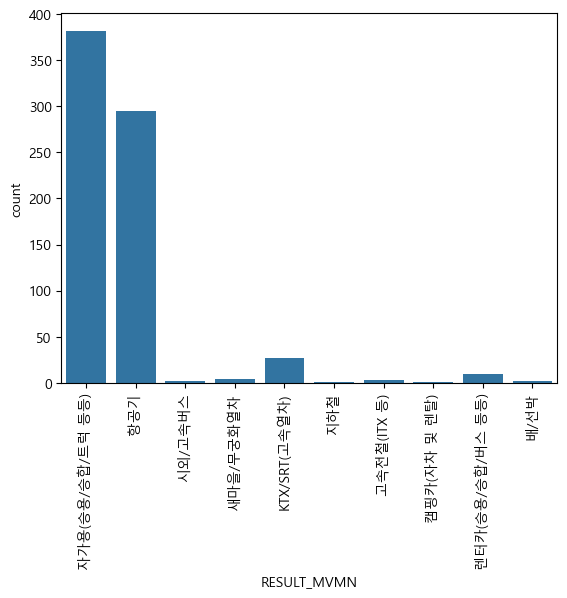

In [267]:
sns.countplot(x='RESULT_MVMN', data=df_clus5)
plt.tick_params(axis='x', rotation=90)
plt.show()

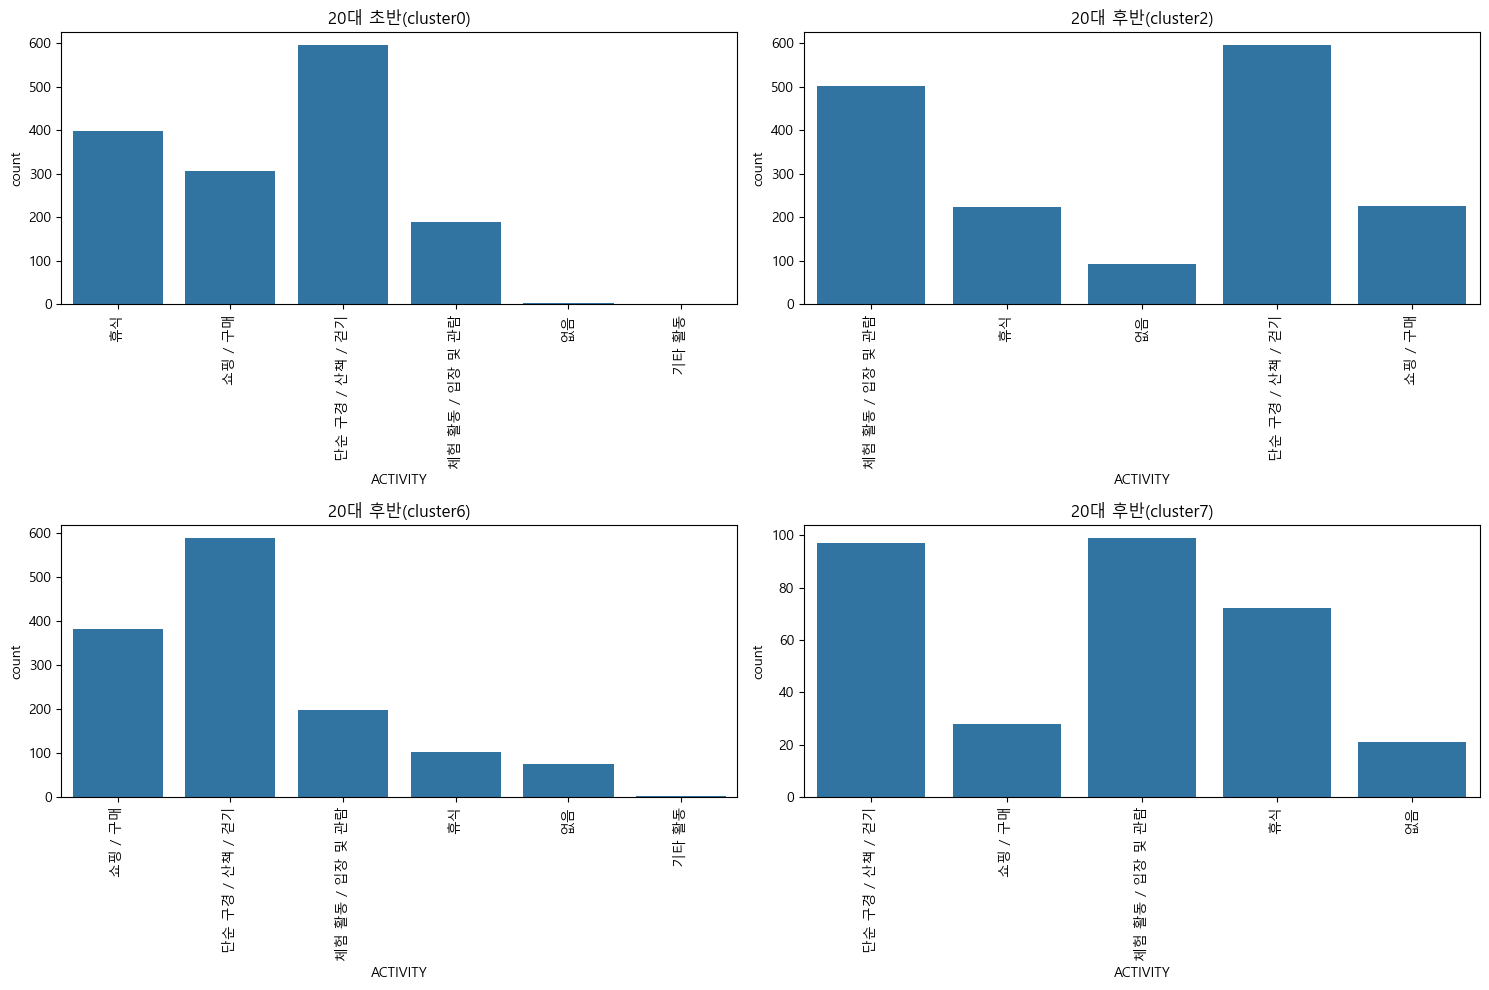

In [230]:
import seaborn as sns
from matplotlib import rc
rc('font', family='Malgun Gothic')  # Windows의 경우
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(2, 2, figsize=(15, 10))  # 1행 3열, 크기 조정

# 첫 번째 서브플롯
sns.countplot(x='ACTIVITY', data=df_clus0, ax=ax[0,0])  # ax[0] 지정
ax[0,0].set_title("20대 초반(cluster0)")
ax[0,0].tick_params(axis='x', rotation=90)

# 두 번째 서브플롯
sns.countplot(x='ACTIVITY', data=df_clus2, ax=ax[0,1])  # ax[1] 지정
ax[0,1].set_title("20대 후반(cluster2)")
ax[0,1].tick_params(axis='x', rotation=90)

# 세 번째 서브플롯
sns.countplot(x='ACTIVITY', data=df_clus6, ax=ax[1,0])  # ax[2] 지정
ax[1,0].set_title("20대 후반(cluster6)")
ax[1,0].tick_params(axis='x', rotation=90)

# 두 번째 서브플롯
sns.countplot(x='ACTIVITY', data=df_clus5, ax=ax[1,1])  # ax[1] 지정
ax[1,1].set_title("20대 후반(cluster7)")
ax[1,1].tick_params(axis='x', rotation=90)


# 레이아웃 조정
plt.tight_layout()
plt.show()

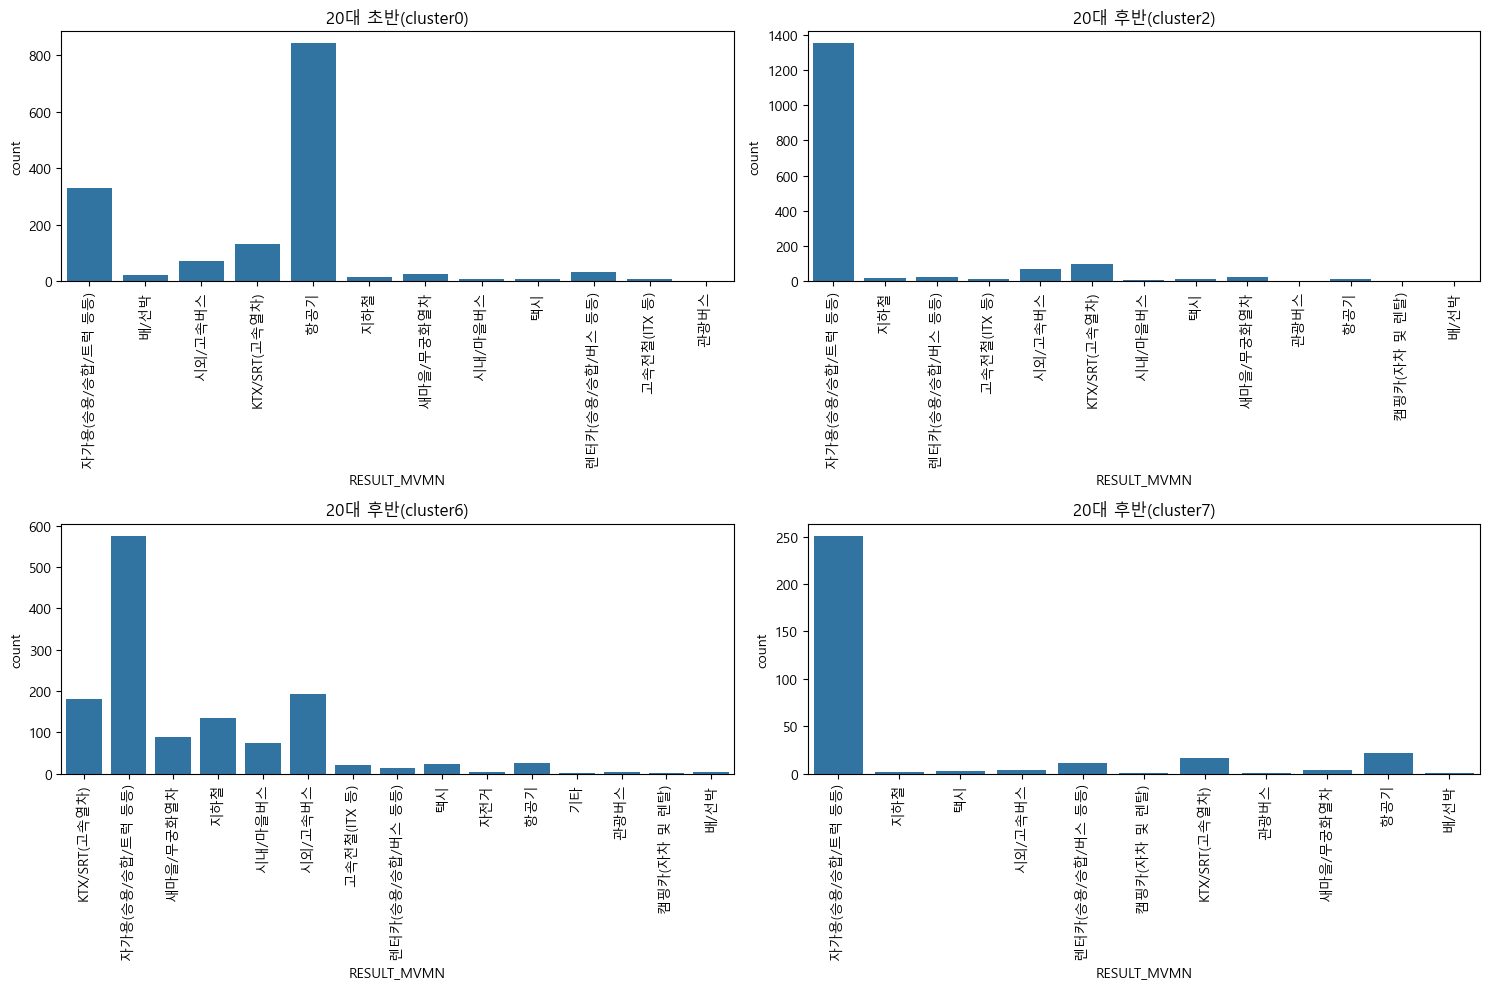

In [231]:
import seaborn as sns
from matplotlib import rc
rc('font', family='Malgun Gothic')  # Windows의 경우
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(2, 2, figsize=(15, 10))  # 1행 3열, 크기 조정

# 첫 번째 서브플롯
sns.countplot(x='RESULT_MVMN', data=df_clus0, ax=ax[0,0])  # ax[0] 지정
ax[0,0].set_title("20대 초반(cluster0)")
ax[0,0].tick_params(axis='x', rotation=90)

# 두 번째 서브플롯
sns.countplot(x='RESULT_MVMN', data=df_clus2, ax=ax[0,1])  # ax[1] 지정
ax[0,1].set_title("20대 후반(cluster2)")
ax[0,1].tick_params(axis='x', rotation=90)

# 세 번째 서브플롯
sns.countplot(x='RESULT_MVMN', data=df_clus6, ax=ax[1,0])  # ax[2] 지정
ax[1,0].set_title("20대 후반(cluster6)")
ax[1,0].tick_params(axis='x', rotation=90)

# 두 번째 서브플롯
sns.countplot(x='RESULT_MVMN', data=df_clus5, ax=ax[1,1])  # ax[1] 지정
ax[1,1].set_title("20대 후반(cluster7)")
ax[1,1].tick_params(axis='x', rotation=90)


# 레이아웃 조정
plt.tight_layout()
plt.show()

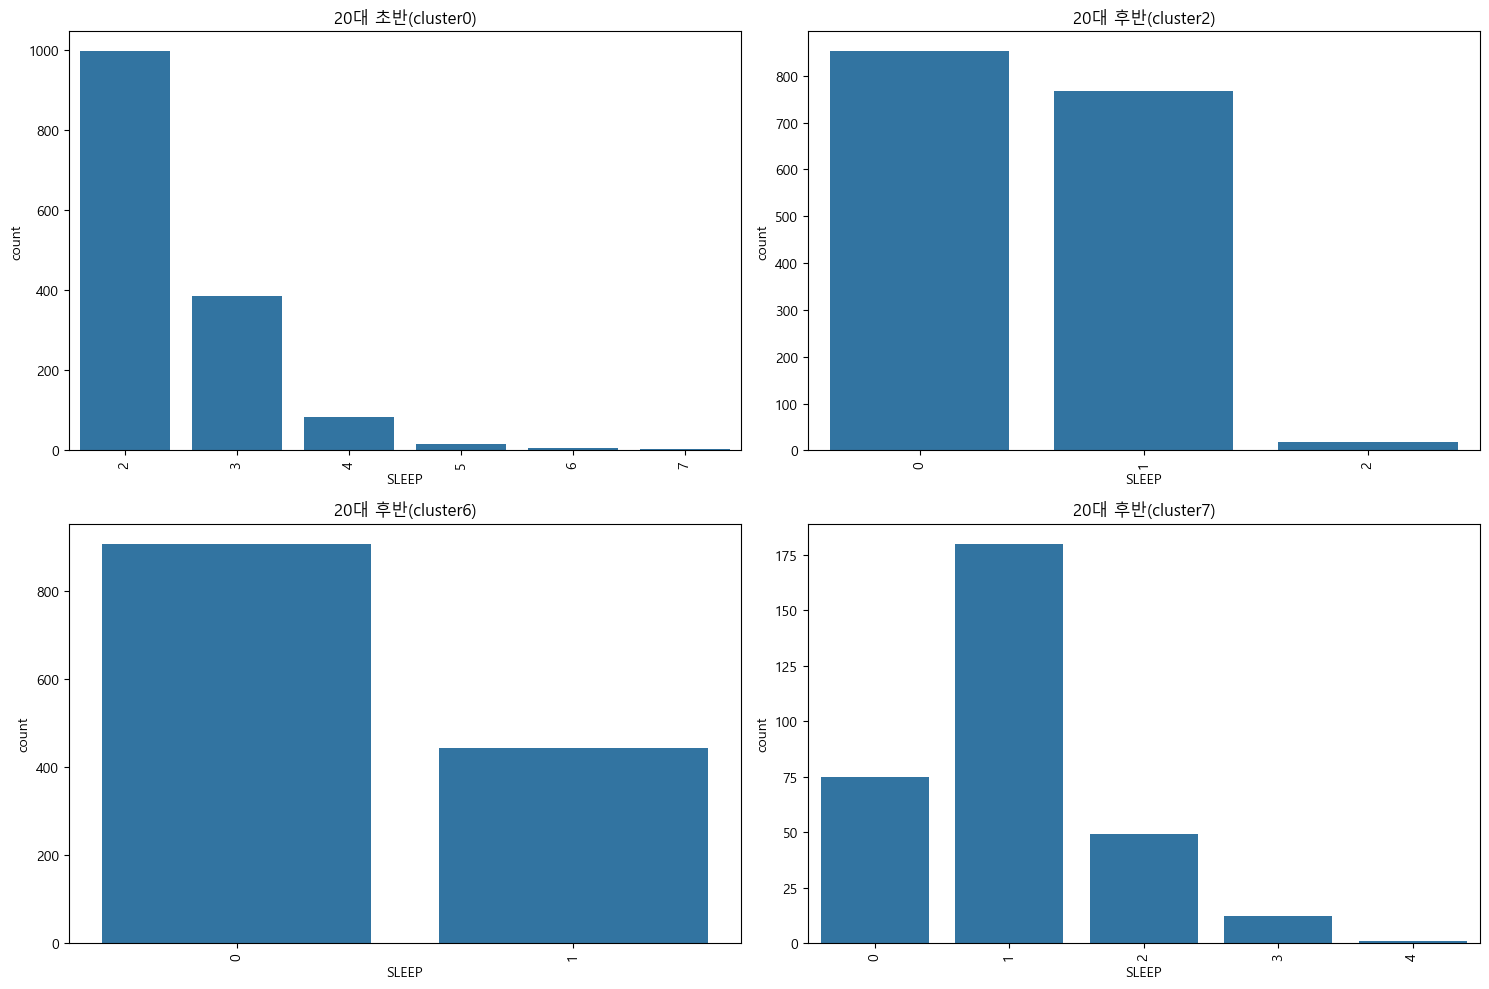

In [232]:
import seaborn as sns
from matplotlib import rc
rc('font', family='Malgun Gothic')  # Windows의 경우
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(2, 2, figsize=(15, 10))  # 1행 3열, 크기 조정

# 첫 번째 서브플롯
sns.countplot(x='SLEEP', data=df_clus0, ax=ax[0,0])  # ax[0] 지정
ax[0,0].set_title("20대 초반(cluster0)")
ax[0,0].tick_params(axis='x', rotation=90)

# 두 번째 서브플롯
sns.countplot(x='SLEEP', data=df_clus2, ax=ax[0,1])  # ax[1] 지정
ax[0,1].set_title("20대 후반(cluster2)")
ax[0,1].tick_params(axis='x', rotation=90)

# 세 번째 서브플롯
sns.countplot(x='SLEEP', data=df_clus6, ax=ax[1,0])  # ax[2] 지정
ax[1,0].set_title("20대 후반(cluster6)")
ax[1,0].tick_params(axis='x', rotation=90)

# 두 번째 서브플롯
sns.countplot(x='SLEEP', data=df_clus5, ax=ax[1,1])  # ax[1] 지정
ax[1,1].set_title("20대 후반(cluster7)")
ax[1,1].tick_params(axis='x', rotation=90)


# 레이아웃 조정
plt.tight_layout()
plt.show()

### 30대

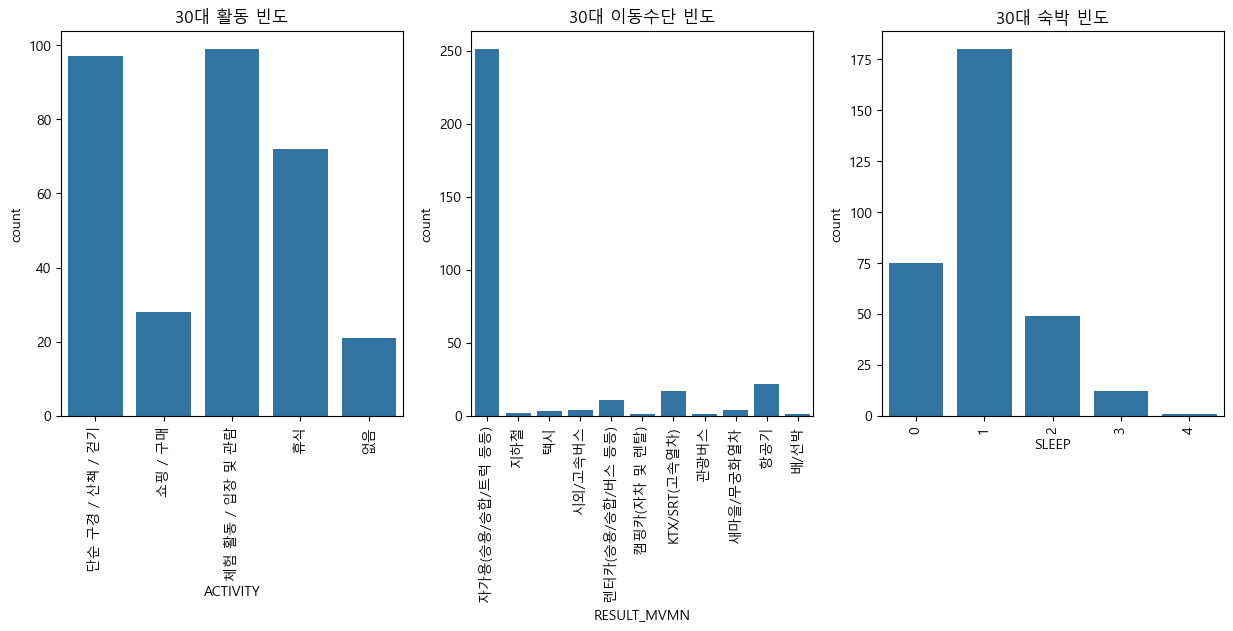

In [239]:
f, ax = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='ACTIVITY', data=df_clus5, ax = ax[0])
ax[0].set_title('30대 활동 빈도')
ax[0].tick_params(axis='x', rotation=90)

sns.countplot(x='RESULT_MVMN', data=df_clus5, ax = ax[1])
ax[1].set_title('30대 이동수단 빈도')
ax[1].tick_params(axis='x', rotation=90)

sns.countplot(x='SLEEP', data=df_clus5, ax = ax[2])
ax[2].set_title('30대 숙박 빈도')
ax[2].tick_params(axis='x', rotation=90)

### 40대

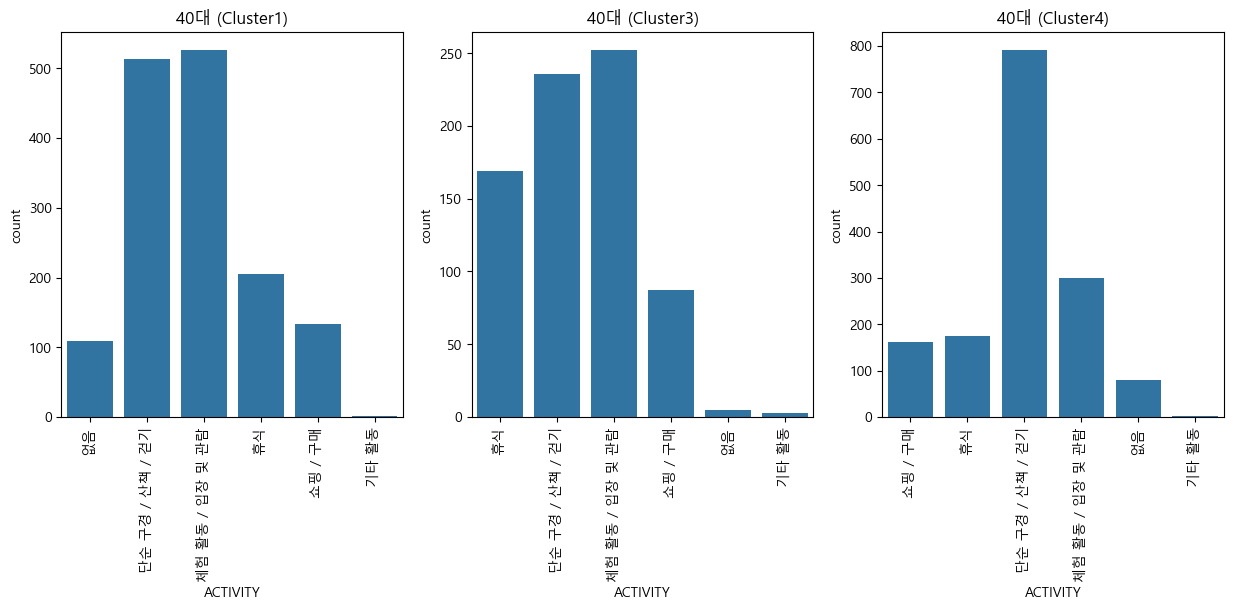

In [240]:
f, ax = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='ACTIVITY', data=df_clus1, ax = ax[0])
ax[0].set_title('40대 (Cluster1)')
ax[0].tick_params(axis='x', rotation=90)

sns.countplot(x='ACTIVITY', data=df_clus3, ax = ax[1])
ax[1].set_title('40대 (Cluster3)')
ax[1].tick_params(axis='x', rotation=90)

sns.countplot(x='ACTIVITY', data=df_clus4, ax = ax[2])
ax[2].set_title('40대 (Cluster4)')
ax[2].tick_params(axis='x', rotation=90)

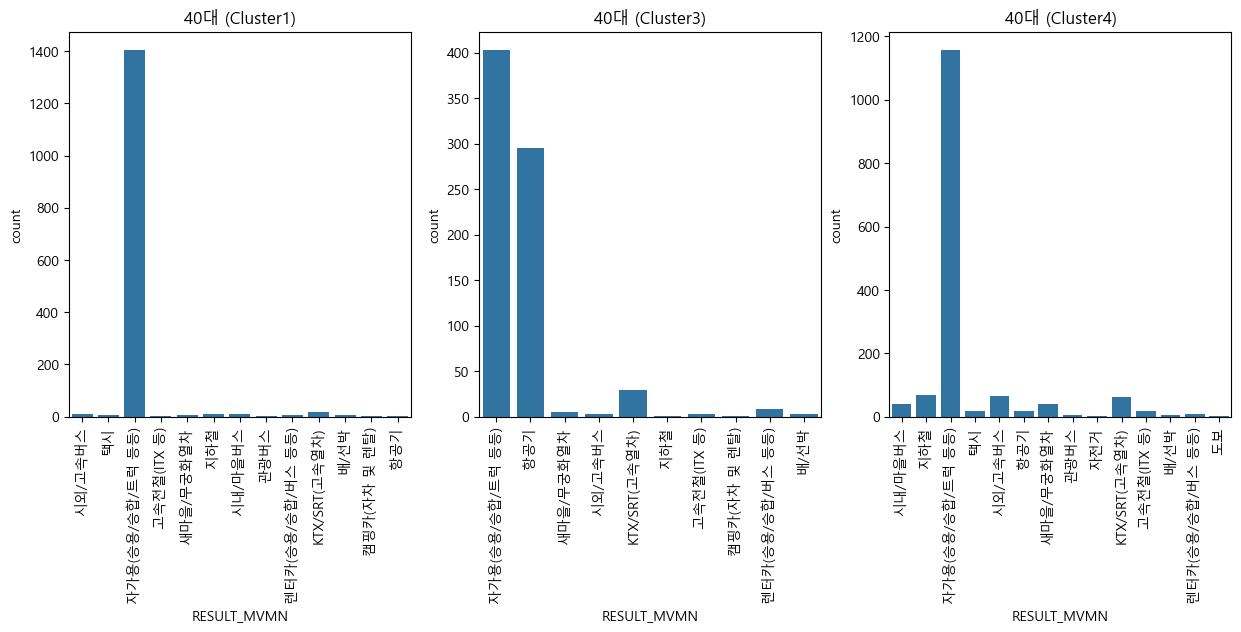

In [242]:
f, ax = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='RESULT_MVMN', data=df_clus1, ax = ax[0])
ax[0].set_title('40대 (Cluster1)')
ax[0].tick_params(axis='x', rotation=90)

sns.countplot(x='RESULT_MVMN', data=df_clus3, ax = ax[1])
ax[1].set_title('40대 (Cluster3)')
ax[1].tick_params(axis='x', rotation=90)

sns.countplot(x='RESULT_MVMN', data=df_clus4, ax = ax[2])
ax[2].set_title('40대 (Cluster4)')
ax[2].tick_params(axis='x', rotation=90)

# 클러스터 예측

In [318]:
# 함수 정의
def cluster_predict(df, model, scaler, age, cp_num, cp_status, day, purpose, traffic):
    input_data = pd.DataFrame({
        'AGE_GRP': [age],
        'TRAVEL_COMPANIONS_NUM': [cp_num],
        'TRAVEL_STATUS_ACCOMPANY': [cp_status],
        'SLEEP': [day],
        'ACTIVITY': [purpose],
        'RESULT_MVMN': [traffic]
    })

    # 범주형 컬럼만 선택
    categorical_columns = input_data.select_dtypes(include='object').columns

    # 훈련 데이터에 대해서 원-핫 인코딩
    df = pd.get_dummies(df, drop_first=True)
    
    # 새로운 사용자 데이터를 원-핫 인코딩
    df = pd.get_dummies(df, drop_first=True)
    
    # 훈련 데이터의 컬럼과 새로운 사용자의 컬럼이 일치하도록 조정
    # 훈련 데이터의 컬럼을 기반으로 새로운 사용자 데이터를 맞춤
    input_data = input_data.reindex(columns=df.columns, fill_value=0)

    # 범주형 데이터를 원-핫 인코딩
    input_data = pd.get_dummies(input_data, columns=categorical_columns, drop_first=True)
    input_data = input_data.astype(int)
    
    numeric_columns = ['AGE_GRP', 'TRAVEL_COMPANIONS_NUM', 'SLEEP']
    
    # 수치형 데이터 표준화
    input_data[numeric_columns] = scaler.transform(input_data[numeric_columns])

    # 데이터 스케일링 (모델 학습 시 사용된 scaler 활용)
    scaled_data = scaler.transform(input_data)
    
    # KMeans 모델로 군집 예측
    predicted_cluster = model.predict(scaled_data)
    
    return predicted_cluster[0]  # 군집 번호 반환

In [330]:
age = 30
cp_status = '2인 여행(가족 외)'
cp_num = 2
day = 1
purpose = '단순 구경 / 산책 / 걷기'
traffic = '항공기'

input_data = pd.DataFrame({
        'AGE_GRP': [age],
        'TRAVEL_COMPANIONS_NUM': [cp_num],
        'TRAVEL_STATUS_ACCOMPANY': [cp_status],
        'SLEEP': [day],
        'ACTIVITY': [purpose],
        'RESULT_MVMN': [traffic]
    })

# 훈련 데이터에 대해서 원-핫 인코딩
df_cp2 = pd.get_dummies(df_cp2, drop_first=True)

# 훈련 데이터의 컬럼을 기반으로 새로운 사용자 데이터를 맞춤
input_data = input_data.reindex(columns=df_cp2.columns, fill_value=0)

input_data.head()


,AGE_GRP,TRAVEL_COMPANIONS_NUM,SLEEP,TRAVEL_STATUS_ACCOMPANY_2인 여행(가족 외),TRAVEL_STATUS_ACCOMPANY_3대 동반 여행(친척 포함),TRAVEL_STATUS_ACCOMPANY_3인 이상 가족 여행(친척 포함),TRAVEL_STATUS_ACCOMPANY_3인 이상 여행(가족 외),TRAVEL_STATUS_ACCOMPANY_나홀로 여행,TRAVEL_STATUS_ACCOMPANY_부모 동반 여행,TRAVEL_STATUS_ACCOMPANY_자녀 동반 여행,...,RESULT_MVMN_배/선박,RESULT_MVMN_새마을/무궁화열차,RESULT_MVMN_시내/마을버스,RESULT_MVMN_시외/고속버스,RESULT_MVMN_자가용(승용/승합/트럭 등등),RESULT_MVMN_자전거,RESULT_MVMN_지하철,RESULT_MVMN_캠핑카(자차 및 렌탈),RESULT_MVMN_택시,RESULT_MVMN_항공기
0,30,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# age = 30
# cp_status = '2인 여행(가족 외)'
# cp_num = 2
# day = 1
# purpose = '단순 구경 / 산책 / 걷기'
# traffic = '항공기'

# cluster = cluster_predict(kmeans, scaler, age, cp_num, cp_status, day, purpose, traffic)
# print(f"새로운 사용자는 {cluster}번 군집에 속합니다.")

# 클러스터링(K-Prototypes)

## 클러스터링 진행

In [24]:
df_cluster.head()

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN
0,e_e004720,60,1,2인 가족 여행,0,쇼핑 / 구매,시내/마을버스
1,e_e000914,20,0,나홀로 여행,0,쇼핑 / 구매,KTX/SRT(고속열차)
2,e_e003564,30,3,자녀 동반 여행,0,체험 활동 / 입장 및 관람,자가용(승용/승합/트럭 등등)
3,e_e000396,30,1,2인 가족 여행,1,휴식,자가용(승용/승합/트럭 등등)
4,e_e001890,20,1,2인 여행(가족 외),0,단순 구경 / 산책 / 걷기,시외/고속버스


In [25]:
df_cp = df_cluster.copy()

In [26]:
df_cp = df_cp.drop(columns=['TRAVEL_ID'])

In [27]:
# from kmodes.kprototypes import KPrototypes
# import matplotlib.pyplot as plt

# # 데이터프레임에서 범주형 컬럼의 인덱스 추출
# categorical_indices = [df_cp.columns.get_loc(col) for col in df_cp.select_dtypes(include=['object', 'category']).columns]

# # 클러스터 수 범위 설정
# cluster_range = range(1, 15)
# costs = []

# # 각 클러스터 수에 대한 KPrototypes 모델 실행
# for n_clusters in cluster_range:
#     kproto = KPrototypes(n_clusters=n_clusters, init='Cao', random_state=42)
#     kproto.fit(df_cp, categorical=categorical_indices)
#     costs.append(kproto.cost_)  # 왜곡 값 저장

# # 엘보우 플롯 생성
# plt.figure(figsize=(8, 5))
# plt.plot(cluster_range, costs, marker='o', linestyle='--')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Cost')
# plt.title('Elbow Method for Optimal k')
# plt.show()


In [30]:
from kmodes.kprototypes import KPrototypes

# 최적의 클러스터 수
optimal_k = 6

# KPrototypes 모델을 최적의 클러스터 수로 학습
kproto = KPrototypes(n_clusters=optimal_k, init='Cao', random_state=SEED)

# 데이터프레임에서 범주형 컬럼 인덱스 추출
categorical_indices = [df_cp.columns.get_loc(col) for col in df_cp.select_dtypes(include=['object', 'category']).columns]

# KPrototypes 모델 학습
kproto.fit(df_cp, categorical=categorical_indices)

# 클러스터 레이블을 데이터프레임에 추가
df_cluster['Cluster'] = kproto.labels_

In [31]:
df_cluster.head()

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
0,e_e004720,60,1,2인 가족 여행,0,쇼핑 / 구매,시내/마을버스,2
1,e_e000914,20,0,나홀로 여행,0,쇼핑 / 구매,KTX/SRT(고속열차),5
2,e_e003564,30,3,자녀 동반 여행,0,체험 활동 / 입장 및 관람,자가용(승용/승합/트럭 등등),4
3,e_e000396,30,1,2인 가족 여행,1,휴식,자가용(승용/승합/트럭 등등),1
4,e_e001890,20,1,2인 여행(가족 외),0,단순 구경 / 산책 / 걷기,시외/고속버스,5


In [32]:
df_cluster['Cluster'].value_counts()

Cluster
5    3940
1    2699
0    2219
3    1151
4    1025
2     486
Name: count, dtype: int64

In [45]:
df_cluster.to_csv('cluster_kprototypes_10.csv', index=False, encoding='utf-8-sig')

## 클러스터 EDA

In [51]:
df_clus0 = df_cluster.loc[df_cluster['Cluster'] == 0, :]
df_clus1 = df_cluster.loc[df_cluster['Cluster'] == 1, :]
df_clus2 = df_cluster.loc[df_cluster['Cluster'] == 2, :]
df_clus3 = df_cluster.loc[df_cluster['Cluster'] == 3, :]
df_clus4 = df_cluster.loc[df_cluster['Cluster'] == 4, :]
df_clus5 = df_cluster.loc[df_cluster['Cluster'] == 5, :]
df_clus6 = df_cluster.loc[df_cluster['Cluster'] == 6, :]
df_clus7 = df_cluster.loc[df_cluster['Cluster'] == 7, :]
df_clus8 = df_cluster.loc[df_cluster['Cluster'] == 8, :]
df_clus9 = df_cluster.loc[df_cluster['Cluster'] == 9, :]

In [58]:
df_clus0.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,456,456.0,456.000000,456,456.000000,456,456,456.0
unique,456,NaN,NaN,4,NaN,5,13,NaN
top,e_e007403,NaN,NaN,3인 이상 여행(가족 외),NaN,체험 활동 / 입장 및 관람,자가용(승용/승합/트럭 등등),NaN
freq,1,NaN,NaN,324,NaN,145,275,NaN
mean,NaN,20.0,3.385965,NaN,0.929825,NaN,NaN,0.0
std,NaN,0.0,2.003332,NaN,0.808953,NaN,NaN,0.0
min,NaN,20.0,2.000000,NaN,0.000000,NaN,NaN,0.0
25%,NaN,20.0,2.000000,NaN,0.000000,NaN,NaN,0.0
50%,NaN,20.0,3.000000,NaN,1.000000,NaN,NaN,0.0
75%,NaN,20.0,3.000000,NaN,1.000000,NaN,NaN,0.0


In [59]:
df_clus1.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,2840,2840.0,2840.000000,2840,2840.000000,2840,2840,2840.0
unique,2840,NaN,NaN,8,NaN,6,13,NaN
top,e_e000914,NaN,NaN,2인 여행(가족 외),NaN,단순 구경 / 산책 / 걷기,자가용(승용/승합/트럭 등등),NaN
freq,1,NaN,NaN,1714,NaN,1180,1397,NaN
mean,NaN,20.0,0.775704,NaN,0.476056,NaN,NaN,1.0
std,NaN,0.0,0.509896,NaN,0.568137,NaN,NaN,0.0
min,NaN,20.0,0.000000,NaN,0.000000,NaN,NaN,1.0
25%,NaN,20.0,0.000000,NaN,0.000000,NaN,NaN,1.0
50%,NaN,20.0,1.000000,NaN,0.000000,NaN,NaN,1.0
75%,NaN,20.0,1.000000,NaN,1.000000,NaN,NaN,1.0


In [60]:
df_clus2.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,2699,2699.0,2699.000000,2699,2699.000000,2699,2699,2699.0
unique,2699,NaN,NaN,7,NaN,6,15,NaN
top,e_e000396,NaN,NaN,2인 여행(가족 외),NaN,단순 구경 / 산책 / 걷기,자가용(승용/승합/트럭 등등),NaN
freq,1,NaN,NaN,1328,NaN,1270,1570,NaN
mean,NaN,30.0,0.755465,NaN,0.851797,NaN,NaN,2.0
std,NaN,0.0,0.505202,NaN,1.010457,NaN,NaN,0.0
min,NaN,30.0,0.000000,NaN,0.000000,NaN,NaN,2.0
25%,NaN,30.0,0.000000,NaN,0.000000,NaN,NaN,2.0
50%,NaN,30.0,1.000000,NaN,1.000000,NaN,NaN,2.0
75%,NaN,30.0,1.000000,NaN,1.000000,NaN,NaN,2.0


In [61]:
df_clus3.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,1005,1005.0,1005.000000,1005,1005.000000,1005,1005,1005.0
unique,1005,NaN,NaN,5,NaN,5,13,NaN
top,e_e001538,NaN,NaN,자녀 동반 여행,NaN,체험 활동 / 입장 및 관람,자가용(승용/승합/트럭 등등),NaN
freq,1,NaN,NaN,629,NaN,445,863,NaN
mean,NaN,40.0,3.169154,NaN,0.996020,NaN,NaN,3.0
std,NaN,0.0,1.606524,NaN,1.064636,NaN,NaN,0.0
min,NaN,40.0,1.000000,NaN,0.000000,NaN,NaN,3.0
25%,NaN,40.0,2.000000,NaN,0.000000,NaN,NaN,3.0
50%,NaN,40.0,3.000000,NaN,1.000000,NaN,NaN,3.0
75%,NaN,40.0,3.000000,NaN,1.000000,NaN,NaN,3.0


In [62]:
df_clus4.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,401,401.0,401.000000,401,401.000000,401,401,401.0
unique,401,NaN,NaN,5,NaN,5,6,NaN
top,e_e005532,NaN,NaN,자녀 동반 여행,NaN,체험 활동 / 입장 및 관람,자가용(승용/승합/트럭 등등),NaN
freq,1,NaN,NaN,225,NaN,185,332,NaN
mean,NaN,50.0,3.837905,NaN,1.264339,NaN,NaN,4.0
std,NaN,0.0,2.100276,NaN,1.290329,NaN,NaN,0.0
min,NaN,50.0,2.000000,NaN,0.000000,NaN,NaN,4.0
25%,NaN,50.0,3.000000,NaN,0.000000,NaN,NaN,4.0
50%,NaN,50.0,3.000000,NaN,1.000000,NaN,NaN,4.0
75%,NaN,50.0,4.000000,NaN,2.000000,NaN,NaN,4.0


In [63]:
df_clus5.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,1025,1025.0,1025.000000,1025,1025.000000,1025,1025,1025.0
unique,1025,NaN,NaN,5,NaN,6,12,NaN
top,e_e003564,NaN,NaN,자녀 동반 여행,NaN,체험 활동 / 입장 및 관람,자가용(승용/승합/트럭 등등),NaN
freq,1,NaN,NaN,553,NaN,406,790,NaN
mean,NaN,30.0,2.919024,NaN,0.938537,NaN,NaN,5.0
std,NaN,0.0,1.322240,NaN,1.066687,NaN,NaN,0.0
min,NaN,30.0,1.000000,NaN,0.000000,NaN,NaN,5.0
25%,NaN,30.0,2.000000,NaN,0.000000,NaN,NaN,5.0
50%,NaN,30.0,3.000000,NaN,1.000000,NaN,NaN,5.0
75%,NaN,30.0,3.000000,NaN,1.000000,NaN,NaN,5.0


In [64]:
df_clus6.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,1214,1214.0,1214.000000,1214,1214.000000,1214,1214,1214.0
unique,1214,NaN,NaN,8,NaN,6,13,NaN
top,e_e008666,NaN,NaN,2인 여행(가족 외),NaN,단순 구경 / 산책 / 걷기,자가용(승용/승합/트럭 등등),NaN
freq,1,NaN,NaN,429,NaN,633,869,NaN
mean,NaN,40.0,0.868204,NaN,0.667216,NaN,NaN,6.0
std,NaN,0.0,0.577764,NaN,0.921286,NaN,NaN,0.0
min,NaN,40.0,0.000000,NaN,0.000000,NaN,NaN,6.0
25%,NaN,40.0,1.000000,NaN,0.000000,NaN,NaN,6.0
50%,NaN,40.0,1.000000,NaN,0.000000,NaN,NaN,6.0
75%,NaN,40.0,1.000000,NaN,1.000000,NaN,NaN,6.0


In [65]:
df_clus7.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,750,750.0,750.000000,750,750.000000,750,750,750.0
unique,750,NaN,NaN,8,NaN,6,13,NaN
top,e_e000782,NaN,NaN,자녀 동반 여행,NaN,단순 구경 / 산책 / 걷기,자가용(승용/승합/트럭 등등),NaN
freq,1,NaN,NaN,241,NaN,414,593,NaN
mean,NaN,50.0,1.430667,NaN,0.737333,NaN,NaN,7.0
std,NaN,0.0,0.870749,NaN,0.920944,NaN,NaN,0.0
min,NaN,50.0,0.000000,NaN,0.000000,NaN,NaN,7.0
25%,NaN,50.0,1.000000,NaN,0.000000,NaN,NaN,7.0
50%,NaN,50.0,1.000000,NaN,0.000000,NaN,NaN,7.0
75%,NaN,50.0,2.000000,NaN,1.000000,NaN,NaN,7.0


In [66]:
df_clus8.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,486,486.0,486.000000,486,486.000000,486,486,486.0
unique,486,NaN,NaN,7,NaN,6,14,NaN
top,e_e004720,NaN,NaN,자녀 동반 여행,NaN,단순 구경 / 산책 / 걷기,자가용(승용/승합/트럭 등등),NaN
freq,1,NaN,NaN,130,NaN,241,374,NaN
mean,NaN,60.0,1.946502,NaN,0.555556,NaN,NaN,8.0
std,NaN,0.0,1.733008,NaN,0.851923,NaN,NaN,0.0
min,NaN,60.0,0.000000,NaN,0.000000,NaN,NaN,8.0
25%,NaN,60.0,1.000000,NaN,0.000000,NaN,NaN,8.0
50%,NaN,60.0,1.000000,NaN,0.000000,NaN,NaN,8.0
75%,NaN,60.0,3.000000,NaN,1.000000,NaN,NaN,8.0


In [67]:
df_clus9.describe(include='all')

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
count,644,644.0,644.000000,644,644.000000,644,644,644.0
unique,644,NaN,NaN,8,NaN,5,12,NaN
top,e_e004860,NaN,NaN,2인 여행(가족 외),NaN,단순 구경 / 산책 / 걷기,항공기,NaN
freq,1,NaN,NaN,341,NaN,240,469,NaN
mean,NaN,20.0,0.798137,NaN,2.456522,NaN,NaN,9.0
std,NaN,0.0,0.645306,NaN,0.813745,NaN,NaN,0.0
min,NaN,20.0,0.000000,NaN,1.000000,NaN,NaN,9.0
25%,NaN,20.0,0.000000,NaN,2.000000,NaN,NaN,9.0
50%,NaN,20.0,1.000000,NaN,2.000000,NaN,NaN,9.0
75%,NaN,20.0,1.000000,NaN,3.000000,NaN,NaN,9.0


## 클러스터 예측

In [49]:
# 함수 정의
def cluster_predict(model, age, cp_num, cp_status, day, purpose, traffic):
    input_data = pd.DataFrame({
        'AGE_GRP': [age],
        'TRAVEL_COMPANIONS_NUM': [cp_num],
        'TRAVEL_STATUS_ACCOMPANY': [cp_status],
        'SLEEP': [day],
        'ACTIVITY': [purpose],
        'RESULT_MVMN': [traffic]
    })
    
    categorical_indices = [input_data.columns.get_loc(col) for col in input_data.select_dtypes(include=['object', 'category']).columns]
    
    # KMeans 모델로 군집 예측
    predicted_cluster = model.predict(input_data, categorical=categorical_indices)
    
    return predicted_cluster[0]  # 군집 번호 반환

In [68]:
age = 30
cp_status = '나홀로 여행'
cp_num = 2
day = 1
purpose = '단순 구경 / 산책 / 걷기'
traffic = '항공기'

cluster = cluster_predict(kproto,age, cp_num, cp_status, day, purpose, traffic)
print(f"새로운 사용자는 {cluster}번 군집에 속합니다.")

새로운 사용자는 2번 군집에 속합니다.
